### Create plots for the results
Use seaborn lineplot 
https://stackabuse.com/seaborn-line-plot-tutorial-and-examples

# Be careful with the order of the algorithms!!! 
#  safeMADDPGsoft, MADDPG, safeMADDPGsoftrewards, safeMADDPGhard

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#abs_path   = os.path.dirname(os.path.abspath(__file__)) + '/'

In [3]:
safe_maddpg_soft = '../data/agents/SafeMADDPG_soft/'
safe_maddpg_hard = '../data/agents/SafeMADDPG_hard/'
maddpg_vanilla   = '../data/agents/MADDPG/'
safe_maddpg_soft_rewards = '../data/agents/SafeMADDPG_soft_reward/'

In [4]:
seed_range = np.arange(5,6)
N = 8000

In [5]:
rewards_soft    = []
rewards_hard    = []
rewards_maddpg = []
rewards_seed=[]
rewards_soft_rewards =[]

collisions_seed=[]
collisions_soft=[]
collisions_hard =[]
collisions_maddpg=[]
collisions_soft_rewards= []
    
infeasibilities_soft = []
infeasibilities_hard = []

In [6]:
#list(range(0,8000, 10))*2

In [8]:
import scipy
sigma = 7
for seed in seed_range:
    

    # Import Results
    
    signal_soft=np.load(safe_maddpg_soft +"seed" + str(seed) + "/" + 'rewards.npy')
    signal_soft_gaus = scipy.ndimage.gaussian_filter1d(signal_soft, sigma = sigma)
    
    signal_hard=np.load(safe_maddpg_hard +"seed" + str(seed) + "/" + 'rewards.npy')
    signal_hard_gaus = scipy.ndimage.gaussian_filter1d(signal_hard, sigma = sigma)
    
    signal_vanilla=np.load(maddpg_vanilla +"seed" + str(seed) + "/" + 'rewards.npy')
    signal_vanilla_gaus = scipy.ndimage.gaussian_filter1d(signal_vanilla, sigma = sigma)
    
    signal_soft_rew = np.load(safe_maddpg_soft_rewards + "seed" + str(seed) + "/" + 'rewards.npy')
    signal_soft_rew_gaus = scipy.ndimage.gaussian_filter1d(signal_soft_rew, sigma = sigma)
    
    #rewards:
    rewards_soft.append(signal_soft_gaus[0:N:10]) #list of arrays
    rewards_hard.append(signal_hard_gaus[0:N:10])
    rewards_maddpg.append(signal_vanilla_gaus[0:N:10])
    rewards_soft_rewards.append(signal_soft_rew_gaus[0:N:10])
    rewards_seed.append([seed]*len(rewards_soft[-1]))
    
    #collisions:
    collisions_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_soft_rewards.append(np.load(safe_maddpg_soft_rewards + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" +'collisions.npy')[0:N])
    collisions_seed.append([seed]*len(collisions_soft[-1]))
    
    
    #infeasibilities:
    #infeasibilities_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])
    #infeasibilities_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])

episodes_list_rew=list(range(0,8000, 10))*len(rewards_soft)
episodes_list_col= list(range(0,8000))*len(rewards_soft)

In [471]:
len(collisions_maddpg)

10

In [9]:
for seed in seed_range:
    

    # Import Results
    
    
    
    
    
    #rewards:
    rewards_soft.append(np.load(safe_maddpg_soft +"seed" + str(seed) + "/" + 'rewards.npy')[0:N:10]) #list of arrays
    rewards_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/"+'rewards.npy')[0:N:10])
    rewards_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" + 'rewards.npy')[0:N:10])
    rewards_soft_rewards.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" + 'rewards.npy')[0:N:10])
    rewards_seed.append([seed]*len(rewards_soft[-1]))
    
    #collisions:
    collisions_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_soft_rewards.append(np.load(safe_maddpg_soft_rewards + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" + 'collisions.npy')[0:N])
    collisions_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" +'collisions.npy')[0:N])
    collisions_seed.append([seed]*len(collisions_soft[-1]))
    
    
    #infeasibilities:
    #infeasibilities_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])
    #infeasibilities_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])

episodes_list_rew=list(range(0,8000, 10))*len(rewards_soft)
episodes_list_col= list(range(0,8000))*len(rewards_soft)

In [10]:
len(collisions_seed[0])

8000

In [11]:
#flatten list
rewards_soft_list = [item for sublist in rewards_soft for item in sublist]
rewards_maddpg_list = [item for sublist in rewards_maddpg for item in sublist]
rewards_soft_rewards_list=[item for sublist in rewards_soft_rewards for item in sublist]
rewards_hard_list = [item for sublist in rewards_hard for item in sublist]
rewards_seed_list= [item for sublist in rewards_seed for item in sublist]
rewards_type=['soft MADDPG']*len(rewards_soft_list) + ['MADDPG']*len(rewards_maddpg_list) + ['soft MADDPG+reward']*len(rewards_soft_rewards_list) + ['MADDPG hard']*len(rewards_hard_list)

In [12]:
rewards_soft_list

[-700.5964084807096,
 -641.1023541004598,
 -612.9437124460583,
 -616.0391676294995,
 -641.1157292854164,
 -620.4056000502327,
 -638.8701537728841,
 -627.3994626742817,
 -592.6417687259083,
 -615.9554856224751,
 -581.8270466805384,
 -539.6676727944462,
 -568.9693225561817,
 -592.1586868197995,
 -571.6787957242469,
 -570.8594989998926,
 -559.2451681169185,
 -563.2434684559942,
 -554.6015061582805,
 -549.0960990536596,
 -558.6309456143965,
 -555.2842965670271,
 -537.8588878067754,
 -512.5371671115971,
 -511.52740705162967,
 -503.66137821518737,
 -506.29810571296906,
 -515.1997887211334,
 -524.6523684220975,
 -530.8556984650654,
 -490.70554309541495,
 -461.4826414993352,
 -485.0088157856317,
 -484.19106304946627,
 -468.6641685258418,
 -470.45268785079986,
 -477.4933103789113,
 -481.02299622250155,
 -518.4096034816864,
 -503.1688402924596,
 -440.88113362525644,
 -423.76422263903214,
 -429.70174414193116,
 -417.8632580870709,
 -410.0014322180026,
 -427.43043760798105,
 -463.31247967876914,
 

In [13]:
rewards_df=pd.DataFrame()
rewards_df['type']=rewards_type
rewards_df['seed']=rewards_seed_list*4
rewards_df['Total Reward']=rewards_soft_list + rewards_maddpg_list + rewards_soft_rewards_list + rewards_hard_list
rewards_df['Episode']=episodes_list_rew*4 #4 times the same, one for each algorithm

In [14]:
rewards_df

,type,seed,Total Reward,Episode
0,soft MADDPG,5,-700.596408,0
1,soft MADDPG,5,-641.102354,10
2,soft MADDPG,5,-612.943712,20
3,soft MADDPG,5,-616.039168,30
4,soft MADDPG,5,-641.115729,40
...,...,...,...,...
6395,MADDPG hard,5,-45.262984,7950
6396,MADDPG hard,5,-36.388502,7960
6397,MADDPG hard,5,-121.443455,7970
6398,MADDPG hard,5,-66.211814,7980


In [15]:
collisions_soft_list = [item for sublist in collisions_soft for item in sublist]
collisions_soft_rewards_list = [item for sublist in collisions_soft_rewards for item in sublist]
collisions_maddpg_list = [item for sublist in collisions_maddpg for item in sublist]
collisions_seed_list= [item for sublist in collisions_seed for item in sublist]
collisions_hard_list= [item for sublist in collisions_hard for item in sublist]
collisions_type=['soft MADDPG']*len(collisions_soft_list) + ['MADDPG']*len(collisions_maddpg_list) + ['soft MADDPG+reward']*len(collisions_soft_rewards_list)+ ['hard MADDPG']*len(collisions_hard_list)

In [16]:
len(episodes_list_col*4)


64000

In [17]:
collisions_df=pd.DataFrame()
collisions_df['Type']=collisions_type
collisions_df['Seed']=collisions_seed_list*4
collisions_df['Total Collisions']=collisions_soft_list + collisions_maddpg_list + collisions_soft_rewards_list+ collisions_hard_list
collisions_df['Episode']=episodes_list_col*4

In [18]:
collisions_df

,Type,Seed,Total Collisions,Episode
0,soft MADDPG,5,0,0
1,soft MADDPG,5,0,1
2,soft MADDPG,5,0,2
3,soft MADDPG,5,0,3
4,soft MADDPG,5,1,4
...,...,...,...,...
63995,hard MADDPG,5,66493,7995
63996,hard MADDPG,5,66493,7996
63997,hard MADDPG,5,66493,7997
63998,hard MADDPG,5,66493,7998


### Plot for rewards: 

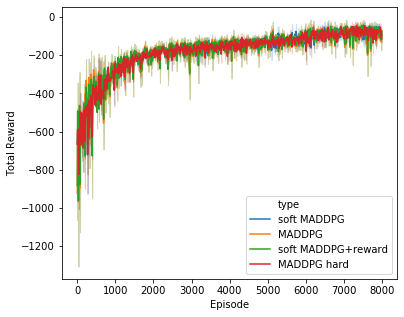

In [19]:
#sigma = 1
fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = "Episode", y = "Total Reward",hue='type', data = rewards_df, ax = ax)
ax.get_legend().set_title(title = '')
plt.show()

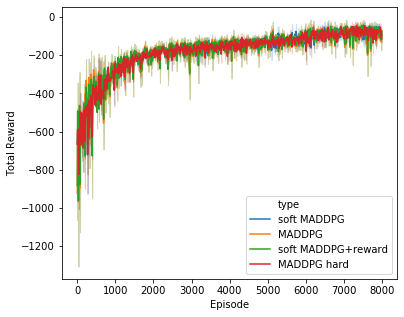

In [20]:
#sigma = 5
fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = "Episode", y = "Total Reward",hue='type', data = rewards_df, ax = ax, ci = 99)
ax.get_legend().set_title(title = '')
plt.show()

In [ ]:
#sigma = 7
fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = "Episode", y = "Total Reward",hue='type', data = rewards_df, ax = ax, ci = 99)
ax.get_legend().set_title(title = '')
plt.show()

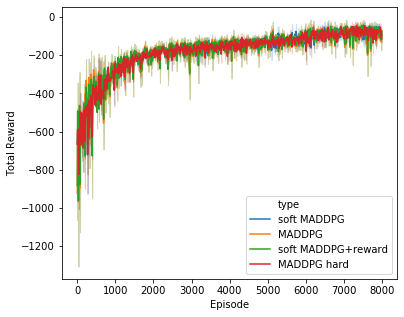

In [21]:
# sigma = 10
fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(x = "Episode", y = "Total Reward",hue='type', data = rewards_df, ax = ax)
ax.get_legend().set_title(title = '')
plt.show()

### Plot for collisions:

### Plot showing all 4 different procedures used.

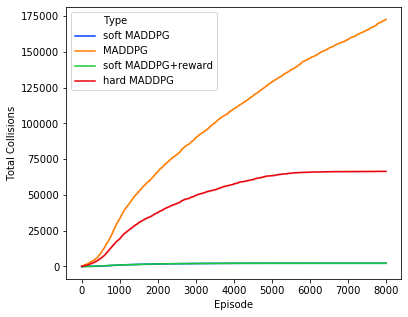

In [22]:
fig_dims = (6,5)
fig, ax = plt.subplots(figsize=fig_dims)
figure = sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type', palette = 'bright', data = collisions_df, ax= ax)
#handles, labels = figure.get_legend_handles_labels()
#figure.legend(handles=handles[1:])
#figure.legend(handles=handles[1:], labels=labels[0:]) #to remove type from the legend
ax.get_legend().set_title(title = '')
plt.show()

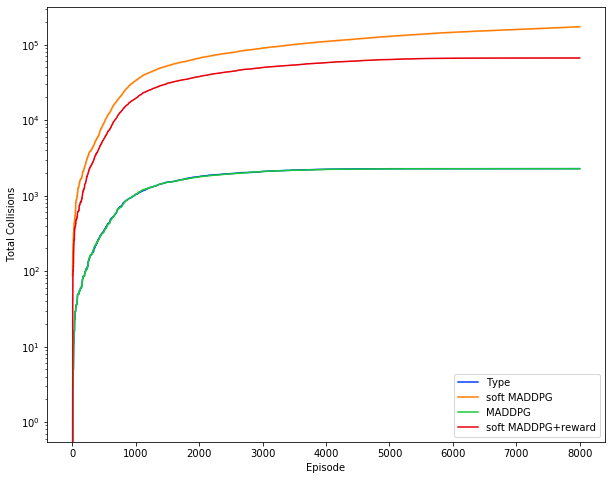

In [23]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
figure2 = sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type', palette = 'bright', data = collisions_df, ax = ax)
handles, labels = figure2.get_legend_handles_labels()
figure2.legend(handles=handles[1:], labels=labels[0:])
figure2.set(yscale='log')
plt.show()

### Plot comparing only the soft constraint procedures.

In [24]:
collisions_soft_df=collisions_df[(collisions_df['Type']!= 'MADDPG') & (collisions_df['Type']!= 'hard MADDPG')]

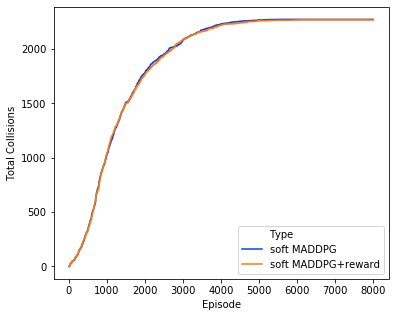

In [25]:
fig_dims = (6, 5)
fig, ax = plt.subplots(figsize=fig_dims)
figure3 = sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type',palette = 'bright', data = collisions_soft_df, ax = ax)
#handles, labels = figure3.get_legend_handles_labels()
#figure3.legend(handles=handles[1:], labels=labels[1:])
ax.get_legend().set_title(title = '')
plt.show()

### Create a barplot with average collisions per episode

### Return the cumsum to original observations:

In [413]:
def return_obs(df,seed):
    col = df[df['Seed']==seed]['Total Collisions'].values
    col_shifted= np.insert(np.delete(col, -1), 0, 0)
    return list(col-col_shifted)

In [416]:
collisions_df

,Type,Seed,Total Collisions,Episode
0,soft MADDPG,5,0,0
1,soft MADDPG,5,0,1
2,soft MADDPG,5,0,2
3,soft MADDPG,5,0,3
4,soft MADDPG,5,1,4
...,...,...,...,...
351995,hard MADDPG,15,69475,7995
351996,hard MADDPG,15,69475,7996
351997,hard MADDPG,15,69475,7997
351998,hard MADDPG,15,69475,7998


In [423]:
observed_col=[]
for alg in ['soft MADDPG','MADDPG','soft MADDPG+reward', 'hard MADDPG']:
    df = collisions_df[collisions_df['Type']== alg]
    for seed in seed_range:
        observed_col.append(return_obs(df=df,seed=seed))         

In [424]:
observed_col_list = [item for sublist in observed_col for item in sublist]

In [425]:
collisions_df['Observed Collisions per Episode']=observed_col_list

In [426]:
collisions_soft_df=collisions_df[(collisions_df['Type']!= 'MADDPG') & (collisions_df['Type']!= 'hard MADDPG')] 
#run again to have the observation column 

### Barplot for the mean of collisions per episode only for the soft procedures

<AxesSubplot:xlabel='Type', ylabel='Observed Collisions per Episode'>

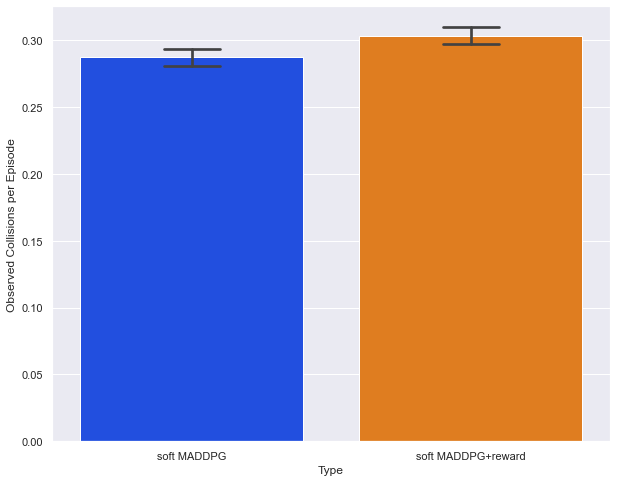

In [427]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(palette= 'bright')
sns.barplot(x='Type', y= 'Observed Collisions per Episode', data = collisions_soft_df , capsize=.2, ax=ax)

### Barplot for median collisions per episode for all 4 algorithms

<AxesSubplot:xlabel='Type', ylabel='Observed Collisions per Episode'>

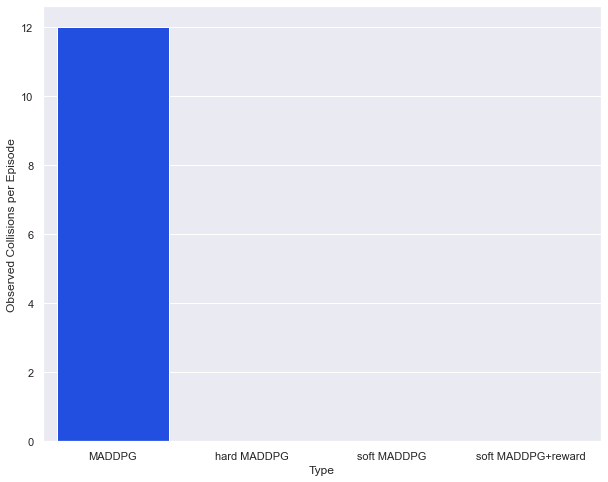

In [428]:
from numpy import median
#sns.set_theme(style="whitegrid")
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(palette= 'bright')
sns.barplot(x='Type', y= 'Observed Collisions per Episode', data = collisions_df, ax = ax, estimator=median, order=["MADDPG", "hard MADDPG", 'soft MADDPG', 'soft MADDPG+reward'])

### Barplot for average collisions per episode for all 4 algorithms (now used the mean instead of median)

<AxesSubplot:xlabel='Type', ylabel='Observed Collisions per Episode'>

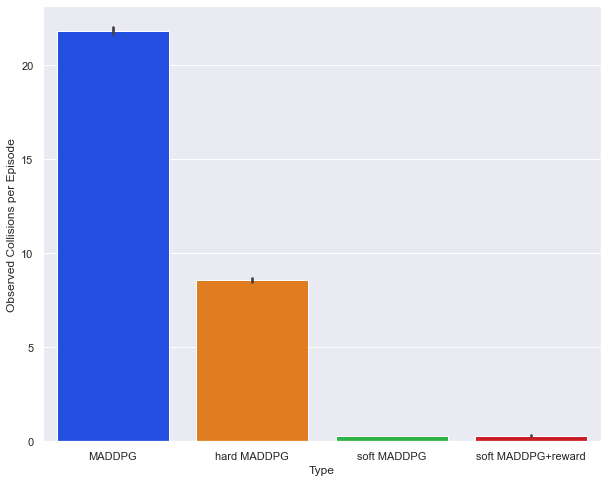

In [429]:
#sns.set_theme(style="whitegrid")
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(palette= 'bright')
sns.barplot(x='Type', y= 'Observed Collisions per Episode', data = collisions_df, ax=ax, order=["MADDPG", "hard MADDPG", 'soft MADDPG', 'soft MADDPG+reward'])

### Also try with boxplot: 

<AxesSubplot:xlabel='Type', ylabel='Observed Collisions per Episode'>

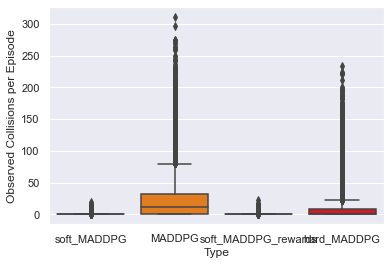

In [287]:
sns.boxplot(x='Type', y='Observed Collisions per Episode', data=collisions_df)

<AxesSubplot:xlabel='Type', ylabel='Observed Collisions per Episode'>

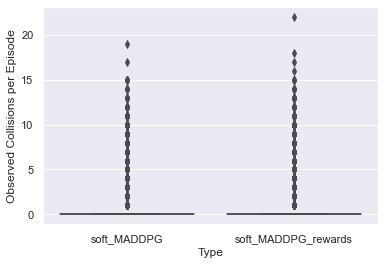

In [289]:
sns.boxplot(x='Type', y='Observed Collisions per Episode', data=collisions_soft_df)

### Results after testing 

In [430]:
collisions_soft_test=[]
collisions_soft_rewards_test=[]
collisions_hard_test = []
collisions_maddpg_test = []
collisions_seed_test = []

for seed in seed_range:
    

    # Import Results
    #rewards:
    #rewards_soft.append(np.load(safe_maddpg_soft +"seed" + str(seed) + "/" + 'rewards.npy')[0:N:10]) #list of arrays
    #rewards_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/"+'rewards.npy')[0:N:10])
    #rewards_maddpg.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" + 'rewards.npy')[0:N:10])
    #rewards_soft_rewards.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" + 'rewards.npy')[0:N:10])
    #rewards_seed.append([seed]*len(rewards_soft[-1]))
    
    #collisions:
    collisions_soft_test.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" + 'test_collisions.npy')[0:N])
    collisions_soft_rewards_test.append(np.load(safe_maddpg_soft_rewards + "seed" + str(seed) + "/" + 'test_collisions.npy')[0:N])
    collisions_hard_test.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" + 'test_collisions.npy')[0:N])
    collisions_maddpg_test.append(np.load(maddpg_vanilla + "seed" + str(seed) + "/" +'test_collisions.npy')[0:N])
    collisions_seed_test.append([seed]*len(collisions_soft_test[-1]))
    
    
    #infeasibilities:
    #infeasibilities_soft.append(np.load(safe_maddpg_soft + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])
    #infeasibilities_hard.append(np.load(safe_maddpg_hard + "seed" + str(seed) + "/" +'infeasible.npy')[0:N])

#episodes_list_rew=list(range(0,8000, 10))*len(rewards_soft)
episodes_list_col_test= list(range(0,100))*len(collisions_soft_test)

In [323]:
len(collisions_soft_test[0])

8000

In [431]:
collisions_soft_list_test = [item for sublist in collisions_soft_test for item in sublist]
collisions_soft_rewards_list_test = [item for sublist in collisions_soft_rewards_test for item in sublist]
collisions_maddpg_list_test = [item for sublist in collisions_maddpg_test for item in sublist]
collisions_seed_list_test= [item for sublist in collisions_seed_test for item in sublist]
collisions_hard_list_test= [item for sublist in collisions_hard_test for item in sublist]
collisions_type_test=['soft MADDPG']*len(collisions_soft_list_test) + ['MADDPG']*len(collisions_maddpg_list_test) + ['soft MADDPG+reward']*len(collisions_soft_rewards_list_test)+ ['hard MADDPG']*len(collisions_hard_list_test)

In [433]:
collisions_df_test=pd.DataFrame()
collisions_df_test['Type']=collisions_type_test
collisions_df_test['Seed']=collisions_seed_list_test*4
collisions_df_test['Collisions per Episode']=collisions_soft_list_test + collisions_maddpg_list_test + collisions_soft_rewards_list_test+ collisions_hard_list_test
collisions_df_test['Episode']=episodes_list_col_test*4

In [331]:
collisions_df_test['Total Collisions'].values

15252

In [343]:
sum(collisions_df_test[collisions_df_test['Type']=='MADDPG']['Total Collisions'].values)

15252

In [453]:
cumsum=[]
for alg in ['soft MADDPG','MADDPG','soft MADDPG+reward', 'hard MADDPG']:
    df = collisions_df_test[collisions_df_test['Type']== alg]
    for seed in seed_range:
        cumsum.append(list(df[df['Seed']==seed]['Collisions per Episode'].cumsum().values))         

In [459]:
#cumsum[0]

In [460]:
cumsum_list = [item for sublist in cumsum for item in sublist]
collisions_df_test['Total Collisions']= cumsum_list

In [461]:
collisions_df_test

,Type,Seed,Collisions per Episode,Episode,Total Collisions
0,soft MADDPG,5,0,0,0
1,soft MADDPG,5,0,1,0
2,soft MADDPG,5,0,2,0
3,soft MADDPG,5,0,3,0
4,soft MADDPG,5,0,4,0
...,...,...,...,...,...
4395,hard MADDPG,15,0,95,0
4396,hard MADDPG,15,0,96,0
4397,hard MADDPG,15,0,97,0
4398,hard MADDPG,15,0,98,0


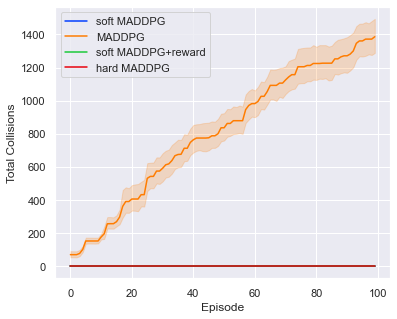

In [462]:
fig_dims = (6,5)
fig, ax = plt.subplots(figsize=fig_dims)
figure = sns.lineplot(x = "Episode", y = "Total Collisions",hue='Type', palette = 'bright', data = collisions_df_test, ax= ax)
#handles, labels = figure.get_legend_handles_labels()
#figure.legend(handles=handles[1:])
#figure.legend(handles=handles[1:], labels=labels[0:]) #to remove type from the legend
ax.get_legend().set_title(title = '')
plt.show()

In [464]:
collisions_df_test

,Type,Seed,Collisions per Episode,Episode,Total Collisions
0,soft MADDPG,5,0,0,0
1,soft MADDPG,5,0,1,0
2,soft MADDPG,5,0,2,0
3,soft MADDPG,5,0,3,0
4,soft MADDPG,5,0,4,0
...,...,...,...,...,...
4395,hard MADDPG,15,0,95,0
4396,hard MADDPG,15,0,96,0
4397,hard MADDPG,15,0,97,0
4398,hard MADDPG,15,0,98,0


<AxesSubplot:xlabel='Type', ylabel='Collisions per Episode'>

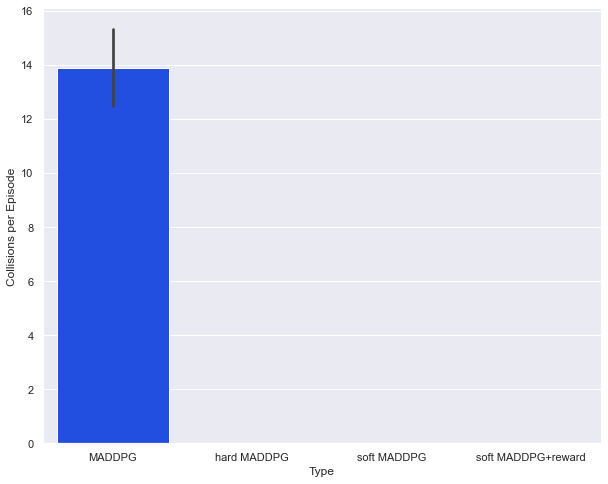

In [465]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(palette= 'bright')
sns.barplot(x='Type', y= 'Collisions per Episode', data = collisions_df_test, ax=ax, order=["MADDPG", "hard MADDPG", 'soft MADDPG', 'soft MADDPG+reward'])